In [4]:
import os
import sys

import numpy as np
from tqdm import trange
from astropy.io import fits
from astropy.table import Table, vstack
from astropy.convolution import convolve, Gaussian1DKernel
import astropy.units as u
import astropy.coordinates as coord
import matplotlib
import matplotlib.pyplot as plt
from astropy.table import Column
from tqdm import trange
import pandas as pd
import fitsio
from astropy.table import Table, vstack
from astropy import units as u
from astropy.coordinates import SkyCoord
from easyquery import Query, QueryMaker
from scipy.stats import binomtest
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, BoundaryNorm

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

rootdir = '/global/u1/v/virajvm/'
sys.path.append(os.path.join(rootdir, 'DESI2_LOWZ/desi_dwarfs/code'))




In [2]:
from desi_lowz_funcs import make_subplots, process_img, sdss_rgb


The panel I want to make is one that has the full grz image, then one with just the source that DESI put a fiber on, 
and last the reconstructed source!

In [3]:
def get_reconstruct_panel(ax, data_row,cutout_size = 128):
    '''
    Function that makes the 3 panel image of the reconstructed dwarf galaxy image
    '''

    file_path = data_row["FILE_PATH"]
    img_path = data_row["IMAGE_PATH"]


    print(data_row["FILE_PATH"])
    

    #getting the tractor model
    tractor_source_model = np.load(file_path + "/tractor_source_model.npy")
    tractor_source_rgb = process_img(tractor_source_model, cutout_size =cutout_size)
    
    #getting the full rgb image
    img_data = fits.open(img_path)[0].data
    img_rgb = process_img(img_data, cutout_size = cutout_size)
    
    ## now I get the reconstructed image 
    aperture_mask = np.load(file_path + "/final_mask_cog.npy")
    tractor_blend_model = np.load(file_path + "/tractor_blend_remove_model.npy")
    tractor_bkg_model = np.load(file_path  + "/tractor_background_model.npy")
    
    # print(np.shape(aperture_mask), np.shape(img_data))
    
    reconstruct_data = img_data - tractor_blend_model - tractor_bkg_model
    reconstruct_data[:,aperture_mask] = 0
    
    reconstruct_rgb = process_img(reconstruct_data, cutout_size = cutout_size)
    
    #getting the full rgb iamge
    ax[0].imshow(img_rgb  ,origin="lower")

    xstart = 0.5
    
    ax[0].text(xstart,0.95,f"z = {data_row['Z']:.3f}",size =15,transform=ax[0].transAxes, verticalalignment='top',
              color="white", ha="center")
    
    ax[1].imshow(tractor_source_rgb ,origin="lower")
    ax[1].text(xstart,0.95,r"$\log M_{\rm star}^{\rm DR9}$ = %.1f"%data_row['LOGM_SAGA_DR9'],size =15,transform=ax[1].transAxes, verticalalignment='top',
              color = "white", ha="center")

    #getting the full rgb iamge
    ax[2].imshow(reconstruct_rgb  ,origin="lower")
    ax[2].text(xstart,0.95,r"$\log M_{\rm star}^{\rm aper}$ = %.1f"%data_row['LOGM_SAGA_APERTURE_COG'],size =15,transform=ax[2].transAxes, 
               verticalalignment='top',color = "white", ha="center")

    tgid = data_row['TARGETID']
    ax[0].set_ylabel( f"${tgid}$", fontsize = 13)
    

    for axi in ax:
        axi.set_yticks([])
        axi.set_xticks([])
        
    return ax

    

In [4]:

sample = "BGS_BRIGHT"

shred_still_dw = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/desi_y1_dwarf_shreds_catalog_filter.fits")
shred_cat = Table.read(f"/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_photometry/iron_{sample}_shreds_catalog_w_aper_mags.fits")

shred_still_dw = shred_still_dw[(shred_still_dw["SAMPLE"] == f"{sample}") & (shred_still_dw["LOGM_SAGA_APERTURE_COG"] < 9) & (shred_still_dw["LOGM_SAGA"] < 9.25) ]
shred_not_dw = shred_cat[ (shred_cat["LOGM_SAGA_APERTURE_COG"] > 9.25) & (shred_cat["LOGM_SAGA"] < 9.25) ]


In [4]:

tot_cat = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/desi_y1_dwarf_combine_catalog.fits")
temp = tot_cat[tot_cat["TARGETID"]==39628031823710332][0]

In [5]:
temp["FILE_PATH"]

'/pscratch/sd/v/virajvm/redo_photometry_plots/all_deshreds/south/sweep-030p010-040p015/0331p102/ELG_tgid_39628031823710332'

/pscratch/sd/v/virajvm/redo_photometry_plots/all_deshreds/south/sweep-030p010-040p015/0331p102/ELG_tgid_39628031823710332


array([<Axes: ylabel='$39628031823710332$'>, <Axes: >, <Axes: >],
      dtype=object)

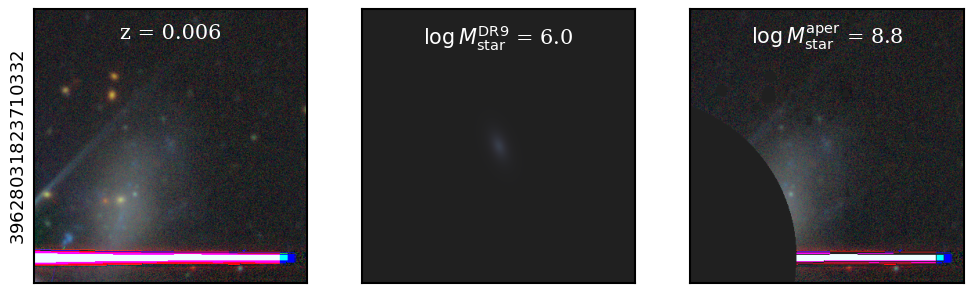

In [6]:
fig,ax = plt.subplots(1,3,figsize = (12,4))

get_reconstruct_panel(ax,  temp,cutout_size = 350 )

It is quite common for things to be grouped together:

BGS_FAINT_tgid_39627930246058449



/pscratch/sd/v/virajvm/redo_photometry_plots/all_deshreds/south/sweep-040p000-050p005/0478p025/BGS_BRIGHT_tgid_39627845927964303
/pscratch/sd/v/virajvm/redo_photometry_plots/all_deshreds/south/sweep-040p000-050p005/0438p030/BGS_BRIGHT_tgid_39627857940449782
/pscratch/sd/v/virajvm/redo_photometry_plots/all_deshreds/south/sweep-060m015-070m010/0673m142/BGS_BRIGHT_tgid_39627444885392178
/pscratch/sd/v/virajvm/redo_photometry_plots/all_deshreds/south/sweep-040p000-050p005/0443p030/BGS_BRIGHT_tgid_39627857948841228
/pscratch/sd/v/virajvm/redo_photometry_plots/all_deshreds/south/sweep-040p000-050p005/0446p030/BGS_BRIGHT_tgid_39627857953033871


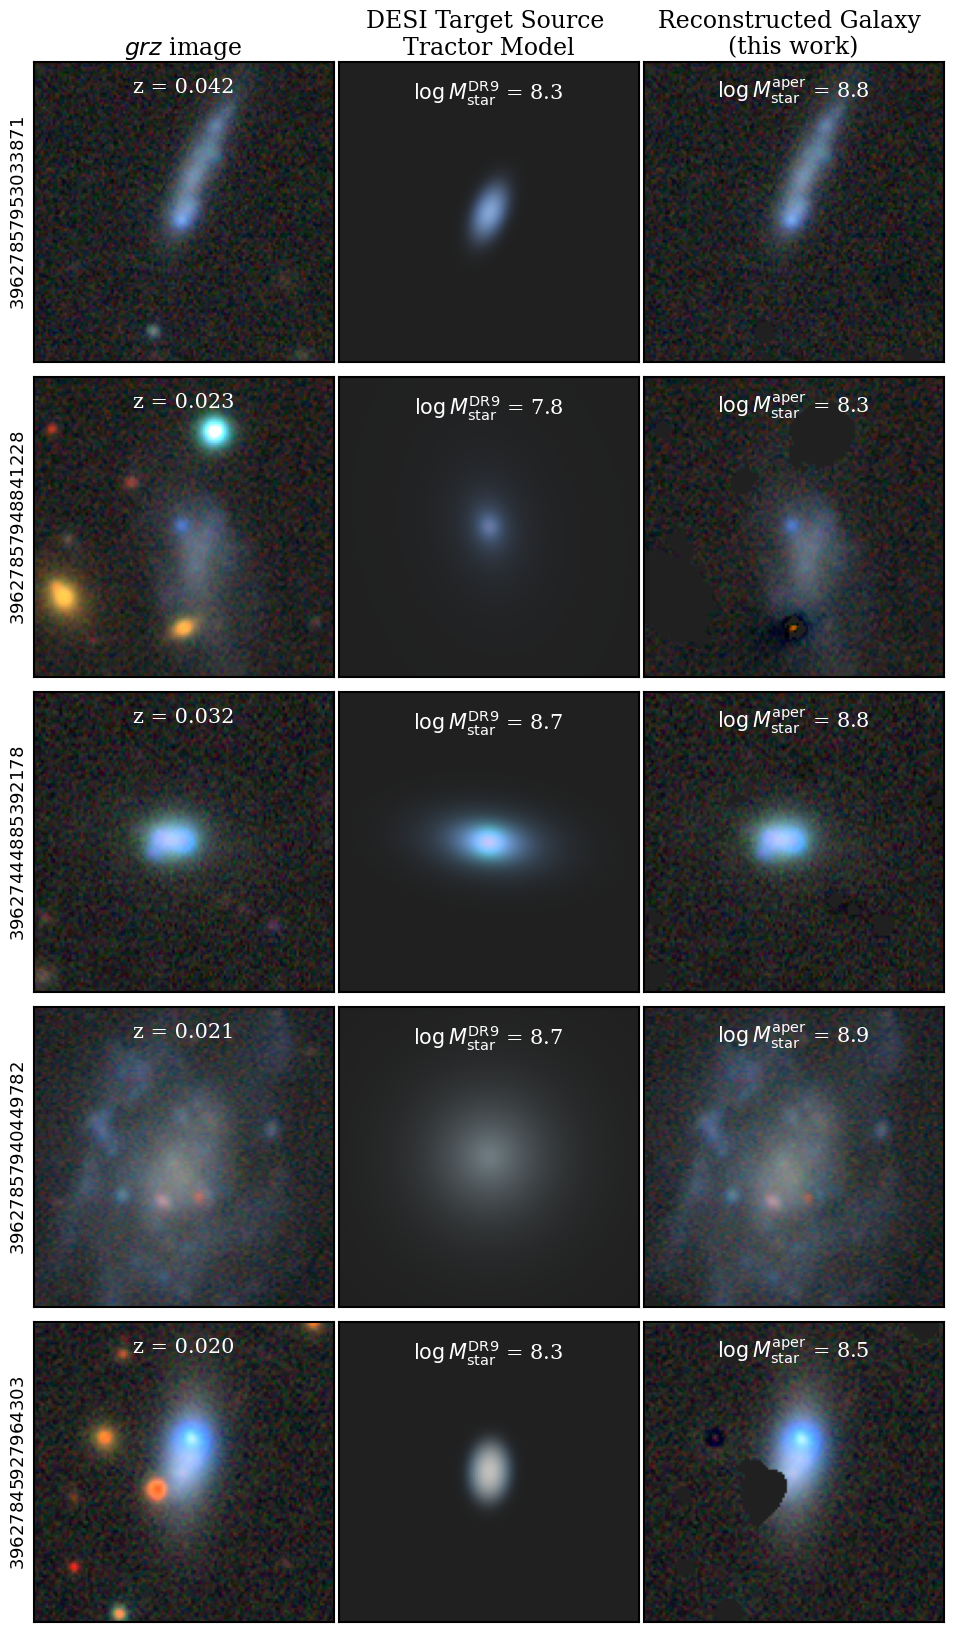

In [158]:
np.random.seed(32)

fig,ax = make_subplots( ncol = 3, nrow = 5,return_fig=True,col_spacing = 0.05,row_spacing = 0.15)

for index in range(5):    
    ax_plot = [ ax[ index*3 ], ax[3*index+1], ax[3*index+2] ]
    # data_row = shred_still_dw[index]
    # index = np.random.randint( len(shred_not_dw) )
    # index = np.random.randint( len(shred_still_dw) )

    if index == 2:
        #to avoid the repeated object in BGS B
        index = np.random.randint( len(shred_still_dw) )

    data_row = shred_still_dw[index]
    # data_row = shred_not_dw[index]
    
    get_reconstruct_panel(ax_plot,  data_row )

ax[6+6].set_title(r"$grz$ image",fontsize = 17)
ax[7+6].set_title("DESI Target Source \nTractor Model",fontsize = 17)
ax[8+6].set_title("Reconstructed Galaxy \n(this work)",fontsize = 17)

plt.savefig(f"/global/homes/v/virajvm/DESI2_LOWZ/quenched_fracs_nbs/paper_plots/{sample}_still_dwarf.png",bbox_inches="tight",dpi=150)

plt.show()




Make a plot that helps us decide what the image cutout size should be.

Loads in the SGA catalog

In [124]:
sga_file = "/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_sga_matched_dwarfs.fits"
sga_data = Table.read(sga_file)


In [125]:
def get_image_size(zred,return_arcmin=True):
    """
    Mimics the boundary:
    - For zred > 0.0125, return 1.53 arcmin
    - For zred <= 0.0125, return the value on the line connecting (0, 8) to (0.0125, 1.53)
    """
    zred = np.asarray(zred)  # Handles scalar or array input

    # Define slope and intercept for the line from (0,8) to (0.0125,1.53)
    x0, y0 = 0.0, 8.0
    x1, y1 = 0.0125, 1.53
    slope = (y1 - y0) / (x1 - x0)
    intercept = y0  # Since x0 = 0

    # Calculate the boundary value
    boundary_val = slope * zred + intercept

    # Apply the cutoff at zred = 0.0125
    img_size_arcmin = np.where(zred > 0.0125, 1.53, boundary_val)
    if return_arcmin:
        return img_size_arcmin
    else:
        img_size_pix = img_size_arcmin*60/0.262
        return img_size_pix.astype(int)

In [126]:
zred_grid = np.linspace(0,0.03,100)

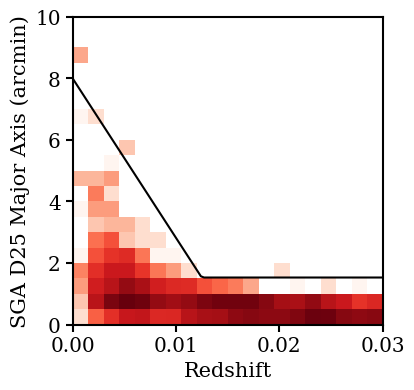

In [127]:
image_size = 2*sga_data["SGA_SMA_SB25"].data / 0.262

sga_data["IMAGE_SIZE_PIX"]= image_size

plt.figure(figsize = (4,4))
plt.hist2d( sga_data["Z"].data, 2*sga_data["SGA_SMA_SB25"].data/60, range=( (0,0.03), (0,10) ),bins=20,norm=LogNorm(),cmap = "Reds" )
# plt.hlines(y = 1.53,color = "k",xmin=0,xmax=0.03,lw = 2)
# plt.plot([0,0.0125],[8,1.53],color = "k",ls = "--",lw = 2)
plt.ylim([0,10])
plt.xlim([0,0.03])
plt.xticks([0,0.01,0.02,0.03])

plt.plot(zred_grid, get_image_size(zred_grid),color = "k")
plt.ylabel(r"SGA D25 Major Axis (arcmin)",fontsize = 15)
plt.xlabel("Redshift",fontsize =15)
# plt.savefig("/global/homes/v/virajvm/DESI2_LOWZ/quenched_fracs_nbs/paper_plots/sga_d25_plots.png",bbox_inches="tight")
plt.show()

In [137]:
sga_file = "/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_sga_matched_dwarfs.fits"
sga_data = Table.read(sga_file)


In [131]:
temp = sga_data[sga_data["IMAGE_SIZE_PIX"] > 500]["TARGETID"]

In [135]:
import glob
template = f"/pscratch/sd/v/virajvm/redo_photometry_plots/all_sga_cutouts/image_tgid_{39627800130355442}*.fits"
print(template)
glob.glob(template)

/pscratch/sd/v/virajvm/redo_photometry_plots/all_sga_cutouts/image_tgid_39627800130355442*.fits


['/pscratch/sd/v/virajvm/redo_photometry_plots/all_sga_cutouts/image_tgid_39627800130355442_ra_198.008192_dec_0.592453.fits']

In [116]:
fits.open("/pscratch/sd/v/virajvm/redo_photometry_plots/all_sga_cutouts/image_tgid_39627601106441031_ra_189.547626_dec_-7.694436.fits")[0].data.shape



(3, 350, 350)

In [122]:

import requests
from io import BytesIO

session = requests.Session()

url_prefix = 'https://www.legacysurvey.org/viewer-dev/'

url = url_prefix + f'cutout.fits?ra={150}&dec={20}&size=%s&'%(1500)

url += 'layer=ls-dr9&pixscale=0.262&bands=grz&invvar&maskbits'
print(url)

https://www.legacysurvey.org/viewer-dev/cutout.fits?ra=150&dec=20&size=1500&layer=ls-dr9&pixscale=0.262&bands=grz&invvar&maskbits


In [123]:
img_path = 'temp.fits'
resp = session.get(url, timeout=30)
resp.raise_for_status()  # Raise error for bad status codes
# Save the FITS file
with open(img_path, "wb") as f:
    f.write(resp.content)

In [73]:
temp = sga_data[(image_size > 1500) & (sga_data["Z"].data < 0.01)]

In [68]:
500*0.262/60

2.183333333333333

In [77]:
1250*0.262/60

5.458333333333333

In [80]:
1982*0.262/60

8.654733333333333

In [78]:
temp = sga_data[(image_size > 1250) & (sga_data["Z"].data < 0.01)]

In [85]:
temp["RA","DEC", "SGA_LOGM_SAGA","Z","OTHER_DIST_MPC","DIST_MPC","MAG_R","SGA_R_COG_MAG", "IMAGE_SIZE"]

RA,DEC,SGA_LOGM_SAGA,Z,OTHER_DIST_MPC,DIST_MPC,MAG_R,SGA_R_COG_MAG,IMAGE_SIZE
deg,deg,,,,,,,
float64,float64,float64,float64,bytes29,float64,float32,float32,float32
39.07308340077417,25.41734334861443,9.198438595255476,0.002207486122716496,--,10.16438267377364,19.012207,12.349806,1526.0979
216.30712230927602,39.530676880441035,9.075015430097062,0.0045583072345237235,--,22.98552761706285,19.363398,13.432993,1332.9714
216.31202237093956,39.53287892338885,9.084485203253493,0.004636834186490416,--,23.23749790960187,19.29375,13.432993,1332.9714
216.3628527458225,39.5464179376147,9.128549303358245,0.005042088084131987,--,24.44676589914499,18.802462,13.432993,1332.9714
186.3948922374827,33.552185606676495,8.043915168515351,0.0011246334042707164,--,3.649491122913104,18.557438,10.75159,1982.7942
186.43257945942952,33.55326474715761,8.040700159342785,0.0011207752005205048,--,3.6360078067994626,18.836246,10.75159,1982.7942
186.44753534736503,33.544457887846654,7.968175980539337,0.0010308313502748313,--,3.3447427236001803,18.957508,10.75159,1982.7942
186.46447053091217,33.574586144366876,8.022930320055941,0.0010982017440407217,--,3.5623770754909057,19.375565,10.75159,1982.7942


In [ ]:
fig,ax = make_subplots(ncol = 4,nrow = 2,row_spacing = 0.2, col_spacing = 0.2,return_fig=True)

keep_inds = [0,1,4,5]
not_keep_inds = [2,3,6,7]

keep_rnds = np.random.choice(len(shred_still_dw), size=4,replace=False)
notkeep_rnds = np.random.choice(len(shred_not_dw), size=4,replace=False)

# np.random.seed(1431415)

# [ 88 135  73 114]
# [1058 1600  691  527]

# keep_rnds = [ 261, 2788, 2168 , 442]
# not_keep_rnds = [14983 , 6711 , 4200,  1680]

print(keep_rnds)
print(notkeep_rnds)


print(shred_still_dw[keep_rnds]["TARGETID"].data)
print(shred_not_dw[notkeep_rnds]["TARGETID"].data)

for i in range(4):
    #load the image
    file_path = shred_still_dw[keep_rnds[i]]["FILE_PATH"]
    img_data = fits.open(shred_still_dw[keep_rnds[i]]["IMAGE_PATH"])[0].data
    #crop this, make it rgb and plot it!
    new_mstar = shred_still_dw[keep_rnds[i]]["LOGM_SAGA_APERTURE_COG"]
    zred = shred_still_dw[keep_rnds[i]]["Z"]
    

    segment_map = np.load(file_path + "/segment_map_final_cog.npy")
    segment_mask = np.load(file_path + "/final_mask_cog.npy")
    segment_map[segment_mask] = 0
    
    rgb_plot = process_img(img_data, cutout_size = 350)
    ax[keep_inds[i]].imshow(rgb_plot)
    ax[keep_inds[i]].contour(segment_map,levels = [1],colors = "r")
    ax[keep_inds[i]].set_xlim([ 350/2 - 48, 350/2 + 48 ])
    ax[keep_inds[i]].set_ylim([ 350/2 - 48, 350/2 + 48 ])
    ax[keep_inds[i]].text( 133, 175 + 38, f"$z$ = {zred:.2f}" r", LogM$^{\text{aper}}_{\ast}$ = " + f"{new_mstar:.2f}",fontsize = 14.5,color = "yellow"  )
    

for i in range(4):

    file_path = shred_not_dw[notkeep_rnds[i]]["FILE_PATH"]
    segment_map = np.load(file_path + "/segment_map_final_cog.npy")
    segment_mask = np.load(file_path + "/final_mask_cog.npy")
    segment_map[segment_mask] = 0
    new_mstar = shred_not_dw[notkeep_rnds[i]]["LOGM_SAGA_APERTURE_COG"]
    zred = shred_not_dw[notkeep_rnds[i]]["Z"]
    
    
    #load the image
    img_data = fits.open(shred_not_dw[notkeep_rnds[i]]["IMAGE_PATH"])[0].data
    #crop this, make it rgb and plot it!
    rgb_plot = process_img(img_data, cutout_size = 350)
    ax[not_keep_inds[i]].imshow(rgb_plot)
    
    ax[not_keep_inds[i]].contour(segment_map,levels = [1],colors = "r")
    ax[not_keep_inds[i]].set_xlim([ 350/2 - 48, 350/2 + 48 ])
    ax[not_keep_inds[i]].set_ylim([ 350/2 - 48, 350/2 + 48 ])
    ax[not_keep_inds[i]].text( 133, 175 + 38, f"$z$ = {zred:.2f}" r", LogM$^{\text{aper}}_{\ast}$ = " + f"{new_mstar:.2f}",fontsize = 14.5,color = "yellow"  )
    

for axi in ax:
    axi.set_xticks([])
    axi.set_yticks([])

# ax[0].text(70,-107,"ELG, Kept", fontsize = 15,color = "blue",weight="bold")
# ax[0].text(270,-107,"ELG, Removed", fontsize = 15,color = "red",weight="bold")

plt.savefig("/global/homes/v/virajvm/DESI2_LOWZ/quenched_fracs_nbs/paper_plots/lowz_keep_notkeep.png",bbox_inches="tight")
plt.show()
